In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import numpy as np
import matplotlib.pyplot as plt
from src.utils.viz_utils import plot_from_dir
from src.dataloader.unet_dataloader import BrainDataset
from src.dataloader.dataloaders import MadisonDataset
from torch.utils.data import DataLoader
from src.utils.variable_utils import BRAIN_DATA, MADISON_DATA

2024-07-10 18:18:37.331503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 18:18:37.331530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 18:18:37.332366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 18:18:37.335819: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_paths = glob.glob(os.path.join(MADISON_DATA, '*'))
print(f"#IMAGES:{len(image_paths)}")

dataset    = MadisonDataset(image_paths=image_paths)
dataloader = DataLoader(dataset=dataset, batch_size=10000)
print(f"#BATCHES:{len(dataloader)}")
data = next(iter(dataloader))

#IMAGES:38496
#BATCHES:4


In [3]:
imgs_flatten = data.reshape(10000,-1)

In [5]:
umap_embeddings = umap.UMAP(random_state=42).fit_transform(imgs_flatten)

/home/syurtseven/miniconda3/envs/gsoc/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


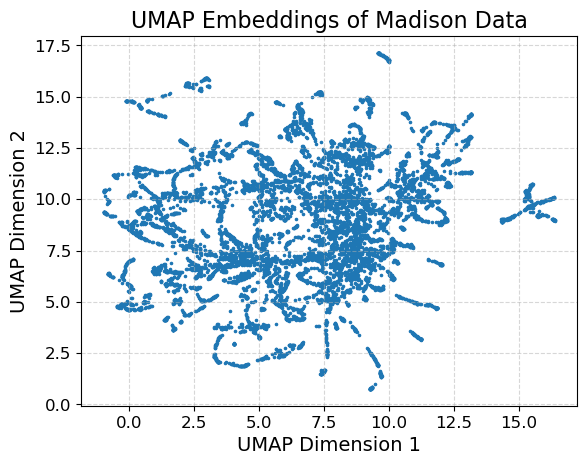

In [11]:
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=2.5)

plt.title('UMAP Embeddings of Madison Data', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('umap_embeddings.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
tumor_type_to_label = {'meningioma': 1, 'glioma': 2, 'pituitary': 3}
label_to_tumor_type = {v: k for k, v in tumor_type_to_label.items()}

fig, ax = plt.subplots(figsize=(10, 8))

colors = {1: 'red', 2: 'blue', 3: 'green'}

for label, color in colors.items():
    indices = data[2] == label
    ax.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], c=color, s=2.5, label=label_to_tumor_type[label])

ax.set_title('UMAP Embeddings of Brain Data', fontsize=16)
ax.set_xlabel('UMAP Dimension 1', fontsize=14)
ax.set_ylabel('UMAP Dimension 2', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tumor Type', fontsize=12, title_fontsize=14, markerscale=10)
plt.savefig('umap_embeddings.jpg', dpi=300, bbox_inches='tight')
plt.show()